<H1> Data Cleaning </H1>

In [2]:
# coding=utf-8
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [3]:
class_label_columns = ['ind_ahor_fin_ult1',         # Saving Account
                       'ind_aval_fin_ult1',         # Guarantees
                       'ind_cco_fin_ult1',          # Current Accounts
                       'ind_cder_fin_ult1',         # Derivada Account
                       'ind_cno_fin_ult1',          # Payroll Account
                       'ind_ctju_fin_ult1',         # Junior Account
                       'ind_ctma_fin_ult1',         # Más particular Account
                       'ind_ctop_fin_ult1',         # particular Account
                       'ind_ctpp_fin_ult1',         # particular Plus Account
                       'ind_deco_fin_ult1',         # Short-term deposits
                       'ind_deme_fin_ult1',         # Medium-term deposits
                       'ind_dela_fin_ult1',         # Long-term deposits
                       'ind_ecue_fin_ult1',         # e-account
                       'ind_fond_fin_ult1',         # Funds
                       'ind_hip_fin_ult1',          # Mortgage
                       'ind_plan_fin_ult1',         # Pensions
                       'ind_pres_fin_ult1',         # Loans
                       'ind_reca_fin_ult1',         # Taxes
                       'ind_tjcr_fin_ult1',         # Credit Card
                       'ind_valo_fin_ult1',         # Securities
                       'ind_viv_fin_ult1',          # Home Account
                       'ind_nomina_ult1',           # Payroll
                       'ind_nom_pens_ult1',         # Pensions
                       'ind_recibo_ult1'            # Direct Debit
                       ]

data_type = {"sexo": str,
             "ind_nuevo": str,
             "ult_fec_cli_1t": str,
             "indext": str}

# List of columns with initial null values
col_with_Null_values = []
# Result returned by df.isnull().any()

ind_empleado = {"A": 1,
                "B": 2,
                "F": 3,
                "N": 4,
                "P": 5}

In [4]:
df = pd.read_csv("train.csv", dtype=data_type)

/Users/amitrajan/Desktop/PythonVirtualEnvs/MLProject/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Fill Missing Class Labels with 0
def fillMissingClassLabels():
    for columns in class_label_columns:
        df[columns].fillna(0, inplace=True)



In [6]:
# Extract month values from date and assign to new variable
def createMonthValues():
    df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month

In [7]:
# Get column name with NULL values
def getColNameWithNullValues():
    for index, value in df.isnull().any().iteritems():
        if value:
            col_with_Null_values.append(index)

In [8]:
# Fill NULL values for the columns with appropriate vlaues
def fillNullValues():
    for columns in col_with_Null_values:
        if columns == "nomprov":
            # UNKNOWN for Province Name
            df[columns].fillna("UNKNOWN", inplace=True)
        elif columns == "ind_nuevo":
            # New customer Index : Fill 1 for the missing value
            df[columns].fillna(1, inplace=True)
        elif columns == "antiguedad":
            # Customer Seniority : Fill with 0
            df[columns].fillna(0, inplace=True)
        elif columns == "fecha_alta":
            # The date in which the customer became as the first holder of a contract in the bank
            # Replace with median value
            dates = df.loc[:, "fecha_alta"].sort_values().reset_index()
            median = int(np.median(dates.index.values))
            df[columns].fillna(dates.loc[median, "fecha_alta"], inplace=True)
        elif columns == "indrel":
            # indrel: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
            df[columns].fillna(1, inplace=True)
        elif columns == "renta":
            # will analyze separately
            pass
        elif columns == "indfall":
            # Deceased index. N/S
            df[columns].fillna("N", inplace=True)
        elif columns == "tiprel_1mes":
            # Customer type at the beginning of the month
            # Fill as potential customer
            df[columns].fillna("P", inplace=True)
        elif columns == "indrel_1mes":
            # Deceased index. N/S
            df[columns].fillna("A", inplace=True)
        else:
            df[columns].fillna("UNKWN", inplace=True)

In [9]:
# Change data types
def changeDataTypeAge():
    df["age"] = pd.to_numeric(df["age"], errors="coerce")

In [10]:
# Remove outliers from age
def removeOutliersFromAge():
    df.loc[df.age < 18, "age"] = df.loc[(df.age >= 18) & (df.age <= 30), "age"].mean(skipna=True)
    df.loc[df.age > 100, "age"] = df.loc[(df.age >= 30) & (df.age <= 100), "age"].mean(skipna=True)
    df["age"].fillna(df["age"].mean(), inplace=True)
    df["age"] = df["age"].astype(int)

In [11]:
# Plot graph
def dataVisualization():
    # Plot of Age distribution
    plt.figure()
    df['age'].plot.hist(alpha=0.5, bins=80, grid=True, color='green', ec='black')
    plt.ylabel('Count')
    plt.title('Age Distribution')
    plt.xlabel("Age")
    plt.savefig("Age Distribution.png")
    plt.close()

In [12]:
start_time = datetime.datetime.now()

In [13]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [14]:
# Fill missing class labels
fillMissingClassLabels()

In [15]:
# Get month values from the date and make a new column as month values are important
createMonthValues()

In [16]:
# Generate list of column names with null values
getColNameWithNullValues()

In [17]:
# Column Names with null values
print df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [18]:
# Fill null values
fillNullValues()

In [19]:
# Fill missing income values with medians of corresponding province
# Fill rent values based on the Median income of the corresponding province
# Code courtsey: Kaggle kernal
grouped = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_temp"]]
new_incomes = new_incomes.rename(columns={"renta_temp":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df = df.reset_index()
new_incomes = new_incomes.reset_index()

df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato", inplace=True)

In [20]:
# Check whether NULL value exists
print df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop

In [21]:
# Change Data Type of age
changeDataTypeAge()

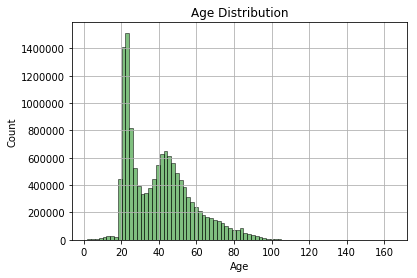

In [22]:
# Histogram Age
%matplotlib inline
plt.figure()
df['age'].plot.hist(alpha=0.5, bins=80, grid=True, color='green', ec='black')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.show()
plt.savefig("Age Distribution Before.png")
plt.close()

In [23]:
# Remove outliers from Age
removeOutliersFromAge()

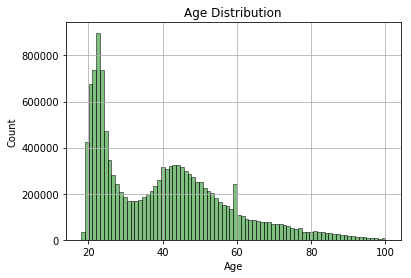

In [24]:
# Histogram Age after outlier removal
%matplotlib inline
plt.figure()
df['age'].plot.hist(alpha=0.5, bins=80, grid=True, color='green', ec='black')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.show()
plt.savefig("Age Distribution.png")
plt.close()

In [25]:
df.to_csv("train_cleaned.csv", sep=',', encoding='utf-8')